In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math
import os
os.chdir("C:/Digital Nest/Forecasting")

In [10]:
#Airlines = pd.read_csv("AirPassengers.csv",dtype={'Month':'O','Passengers':'double'})
Airlines = pd.read_csv("AirPassengers.csv",index_col=0,
                       dtype={'Passengers':'double'})
print(Airlines.dtypes)
print(Airlines.shape)
print(Airlines.head())
print(Airlines.tail())

Passengers    float64
dtype: object
(144, 1)
         Passengers
Month              
1949-01       112.0
1949-02       118.0
1949-03       132.0
1949-04       129.0
1949-05       121.0
         Passengers
Month              
1960-08       606.0
1960-09       508.0
1960-10       461.0
1960-11       390.0
1960-12       432.0


In [11]:
# count of observations
count = Airlines.shape[0]
print(count)

144


In [12]:
print(Airlines.columns.values)

['Passengers']


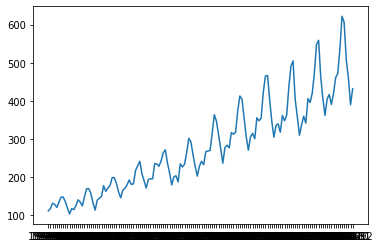

In [13]:
plt.plot(Airlines.Passengers)
plt.show()

In [14]:
# Dickey Fuller test
# Null Hypothesis: time series is not stationary
# if p > 5%, null hypothesis is correct i.e. time series is not stationary
# if p < 5%, null hypothesis is wrong i.e. time series is stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(Airlines.Passengers)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [21]:
# moving average
order = 2
ma = list()
for i in np.arange(0,count-order):
    total = 0
    for j in np.arange(i,i+order):
        total = total + Airlines.Passengers[j]
    average = total / order
    ma.append(average)
print(len(ma))
mas = pd.Series(ma)

142


In [16]:
Airlines.Passengers.index[order:Airlines.shape[0]]

Index(['1949-02', '1949-03', '1949-04', '1949-05', '1949-06', '1949-07',
       '1949-08', '1949-09', '1949-10', '1949-11',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=143)

In [17]:
mas.reindex(index=Airlines.Passengers.index[order:Airlines.shape[0]])
print(mas.index)

RangeIndex(start=0, stop=143, step=1)


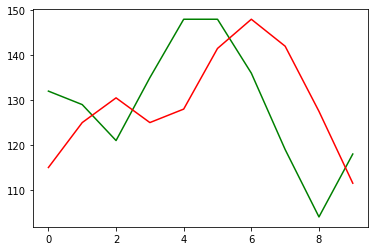

In [22]:
# plot actual and moving average
Actuals = list(Airlines.Passengers[order:144]) 
plt.plot(Actuals[0:10], c='g')
plt.plot(mas[0:10],c='r')
plt.show()

In [23]:
# calcualted RMSE
print(math.sqrt(mean_squared_error(Actuals, ma)))
print(np.corrcoef(Actuals, ma)**2)

42.148713912847235
[[1.         0.87789103]
 [0.87789103 1.        ]]


In [24]:
# weighted moving average
count = Airlines.shape[0]
order = 3
weights = [0.2,0.3,0.5]
wma = list()
for i in np.arange(0,count-order):
    weightavg = 0
    k = 0
    for j in np.arange(i,i+order):
        weightavg = weightavg + ( Airlines.Passengers[j] * weights[k] )
        k = k + 1
    wma.append(weightavg)
print(len(wma))

141


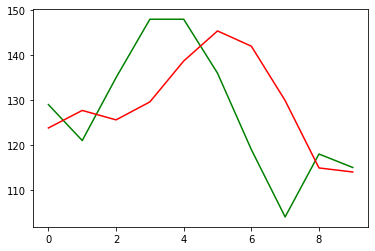

In [25]:
# plot actual and wieghted moving average
Actuals = list(Airlines.Passengers[order:144]) 
plt.plot(Actuals[0:10], c='g')
plt.plot(wma[0:10],c='r')
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(Actuals, wma)))
print(np.corrcoef(Actuals, wma)**2)

43.14011149566209
[[1.         0.87080253]
 [0.87080253 1.        ]]


In [35]:
# auto regression
from statsmodels.tsa.ar_model import AR, ARResults
#from statsmodels.tsa.ar_model.AR import select_order
ARmodel = AR(Airlines.Passengers,dates=Airlines.index)
order = 12
ARmodelO = ARmodel.fit(maxlag = order,trend = 'c',ic = None, disp=True)
print("Regression parameters:\n",ARmodelO.params)
print("regression order:\n",ARmodelO.k_ar)

Regression parameters:
 const             9.436883
L1.Passengers     0.443705
L2.Passengers    -0.271588
L3.Passengers     0.194384
L4.Passengers    -0.215329
L5.Passengers     0.233579
L6.Passengers    -0.198360
L7.Passengers     0.179037
L8.Passengers    -0.268732
L9.Passengers     0.279332
L10.Passengers   -0.252873
L11.Passengers    0.317949
L12.Passengers    0.612683
dtype: float64
regression order:
 12


C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [36]:
# predict for auto regression
ARpredict = ARmodelO.predict(start=order, end=count-1)
print(ARpredict.head())
print(ARpredict.tail())

1950-01-01    133.054619
1950-02-01    131.079758
1950-03-01    151.199901
1950-04-01    144.699668
1950-05-01    143.436938
Freq: MS, dtype: float64
1960-08-01    606.635587
1960-09-01    528.930062
1960-10-01    443.236881
1960-11-01    415.487163
1960-12-01    424.208533
Freq: MS, dtype: float64


In [29]:
print(ARmodelO.params[0]+(ARmodelO.params[1]*Airlines.Passengers[2])+
                         (ARmodelO.params[2]*Airlines.Passengers[1])+
                        (ARmodelO.params[3]*Airlines.Passengers[0]))

144.37425545185306


In [31]:
# predict for auto regression
ARfuture = ARmodelO.predict(start=144,end=156)
print(ARfuture)

1961-01-01    458.298818
1961-02-01    454.568722
1961-03-01    442.451613
1961-04-01    433.630363
1961-05-01    428.155883
1961-06-01    423.550281
1961-07-01    418.800553
1961-08-01    414.017735
1961-09-01    409.450964
1961-10-01    405.165970
1961-11-01    401.126331
1961-12-01    397.294325
1962-01-01    393.653912
Freq: MS, dtype: float64


In [37]:
ARpredict2 = list(ARpredict)
print(len(ARpredict2))
print(ARpredict2[0:5])

132
[133.05461904776627, 131.07975805581844, 151.19990096202753, 144.69966799032863, 143.43693763649685]


132


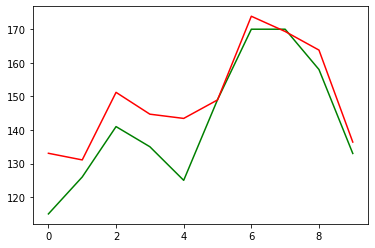

In [38]:
# plot actual and predicted
Actuals = list(Airlines.Passengers[order:144])
print(len(Actuals))
plt.plot(Actuals[0:10], c='g')
plt.plot(ARpredict2[0:10],c='r')
plt.show()

In [41]:
# identifyig the best order
ARmodel2 = AR(Airlines.Passengers,dates=Airlines.index)
bestorder = ARmodel2.select_order(maxlag=12, ic='aic', trend='c',
                                 method='mle')
print(bestorder)

C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8


C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [39]:
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(Actuals, ARpredict2)))
print(np.corrcoef(Actuals, ARpredict2)**2)

13.510646174724856
[[1.         0.98620774]
 [0.98620774 1.        ]]


In [57]:
# ARMA model
from statsmodels.tsa.arima_model import ARMA
ARorder = 3
MAorder = 3
model = ARMA(Airlines.Passengers, order=(ARorder,MAorder),
             dates=Airlines.index)
ARMAmodel = model.fit(disp=False,maxiter=100000)
print("ARMA parameters:\n",ARMAmodel.params)

C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA parameters:
 const               280.567736
ar.L1.Passengers      2.627549
ar.L2.Passengers     -2.506081
ar.L3.Passengers      0.878531
ma.L1.Passengers     -1.613302
ma.L2.Passengers      0.468109
ma.L3.Passengers      0.259523
dtype: float64


C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [52]:
# predict for ARMA
ARMApredict = ARMAmodel.predict(start=3, end=143)
#print(ARMApredict.head())
print(len(ARMApredict))
results = pd.DataFrame({"Actuals":Airlines.Passengers[3:144],
                        "Predict":ARMApredict})
print(results[0:10])
#print(ARMApredict.tail())

1949-04-01    136.866859
1949-05-01    125.246879
1949-06-01    116.097214
1949-07-01    137.368619
1949-08-01    146.641901
Freq: MS, dtype: float64
141
         Actuals     Predict
1949-04    129.0  136.866859
1949-05    121.0  125.246879
1949-06    135.0  116.097214
1949-07    148.0  137.368619
1949-08    148.0  146.641901
1949-09    136.0  141.352326
1949-10    119.0  126.824296
1949-11    104.0  111.934861
1949-12    118.0  102.424664
1950-01    115.0  125.492804


In [44]:
errors = model.geterrors(ARMAmodel.params)
print(errors[0:5])
print(Airlines.Passengers[0]-ARMApredict[0])
print(Airlines.Passengers[1]-ARMApredict[1])
print(Airlines.Passengers[2]-ARMApredict[2])

[-168.56773588    5.99942675   11.83853184   -7.86685869   -4.24687854]
-168.56773588322545
5.999426746560232
11.838531841113593


In [54]:
# plot actual and predicted
Actuals = list(Airlines.Passengers[ARorder:144])
print(len(Actuals))
ARMApredict2 = list(ARMApredict)
print(len(ARMApredict2))
print(ARMApredict2[0:5])

141
141
[136.8668586868107, 125.24687853951042, 116.09721378231569, 137.36861851545032, 146.64190091581983]


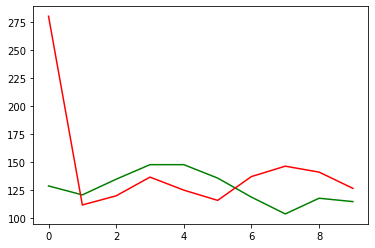

In [46]:
plt.plot(Actuals[0:10], c='g')
plt.plot(ARMApredict2[0:10],c='r')
plt.show()

In [55]:
print(math.sqrt(mean_squared_error(Actuals, ARMApredict2)))
print(np.corrcoef(Actuals, ARMApredict2)**2)

25.873861370700293
[[1.         0.95483134]
 [0.95483134 1.        ]]


In [68]:
# ARIMA mode
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Airlines.Passengers, order=(3,1,3),dates=Airlines.index)
ARIMAmodel = model.fit(disp=False,maxiter=1000000)
print("ARIMA parameters:\n",ARIMAmodel.params)

C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA parameters:
 const                 2.578152
ar.L1.D.Passengers    0.966103
ar.L2.D.Passengers    0.188935
ar.L3.D.Passengers   -0.587752
ma.L1.D.Passengers   -1.010258
ma.L2.D.Passengers   -0.720512
ma.L3.D.Passengers    0.900160
dtype: float64


In [62]:
# predict for ARIMA
ARIMApredict = ARIMAmodel.predict(start=3, end=143,typ='levels')
print(type(ARIMApredict))
print(len(ARIMApredict))
print(ARIMApredict[0:5])
print(ARIMApredict[139:141])

<class 'pandas.core.series.Series'>
141
1949-04-01    138.152369
1949-05-01    127.391815
1949-06-01    120.741610
1949-07-01    139.426960
1949-08-01    149.381672
Freq: MS, dtype: float64
1960-11-01    431.667589
1960-12-01    365.452336
Freq: MS, dtype: float64


In [63]:
ARIMApredict2 = list(ARIMApredict)
print(len(ARIMApredict2))
print(ARIMApredict2[0:5])

141
[138.15236934020913, 127.39181469246701, 120.74160951511908, 139.42695970121014, 149.38167233792072]


In [64]:
# 
Actuals = list(Airlines.Passengers[3:144])
print(len(Actuals))

141


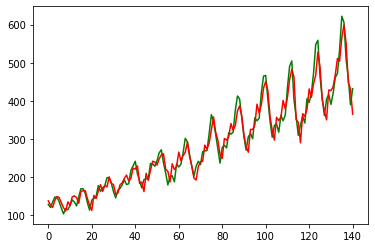

In [65]:
# plot actual and predicted
plt.plot(Actuals, c='g')
plt.plot(ARIMApredict2,c='r')
plt.show()

In [66]:
print(math.sqrt(mean_squared_error(Actuals, ARIMApredict2)))
print(np.corrcoef(Actuals, ARIMApredict2)**2)

24.234779043867594
[[1.         0.95826117]
 [0.95826117 1.        ]]


In [69]:
# Simple exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(Airlines.Passengers)
SE = model.fit(smoothing_level = 0.95)

C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [70]:
# predict for SE
SEpredict = list(SE.predict(start=1, end=143))
print(len(SEpredict))
print(type(SEpredict))
print(SEpredict[0:5])
print(SEpredict[138:144])

143
<class 'list'>
[112.01672617412014, 117.700836308706, 131.2850418154353, 129.11425209077177, 121.40571260453858]
[617.4908541452892, 606.5745427072644, 512.9287271353633, 463.59643635676815, 393.67982181783844]


143


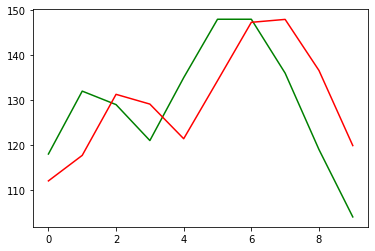

In [71]:
# plot actual and predicted
import matplotlib.pyplot as plt
Actuals = list(Airlines.Passengers[1:144])
print(len(Actuals))
plt.plot(Actuals[0:10], c='g')
plt.plot(SEpredict[0:10],c='r')
plt.show()

In [72]:
print(math.sqrt(mean_squared_error(Actuals, SEpredict)))
print(np.corrcoef(Actuals, SEpredict)**2)

34.254471279469655
[[1.         0.91936124]
 [0.91936124 1.        ]]


In [86]:
# Holtwinter exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(Airlines.Passengers,trend='mul',
                             seasonal='mul',
                            seasonal_periods=12)
HES = model.fit(smoothing_level=0.4,smoothing_slope=0.4,smoothing_seasonal=0.4)

C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [87]:
# predict for HES
HESpredict = list(HES.predict(start=12, end=143))
print(len(HESpredict))
print(type(HESpredict))
print(HESpredict[0:5])
print(HESpredict[126:130])

132
<class 'list'>
[125.22743219198014, 126.63637514015953, 141.66263510469315, 135.73648679967027, 124.85018681763442]
[614.7404821420655, 621.1120519103921, 504.14635956074324, 441.7559610059091]


132


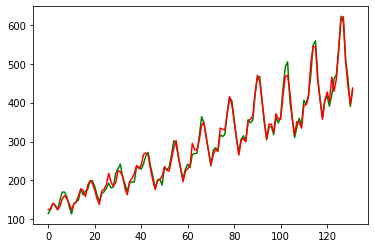

In [88]:
# plot actual and predicted
Actuals = list(Airlines.Passengers[12:144])
print(len(Actuals))
plt.plot(Actuals, c='g')
plt.plot(HESpredict,c='r')
plt.show()

In [89]:
print(math.sqrt(mean_squared_error(Actuals, HESpredict)))
print(np.corrcoef(Actuals, HESpredict)**2)

12.060141668501469
[[1.        0.9890105]
 [0.9890105 1.       ]]


In [94]:
from statsmodels.tsa.seasonal import seasonal_decompose
sd = seasonal_decompose(Airlines.Passengers,model='mul',
                       freq=12)

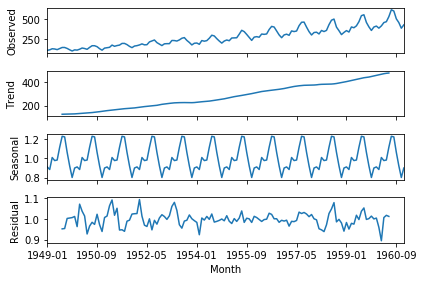

In [95]:
sd.plot()
plt.show()

In [96]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(Airlines.Passengers):
    print('train : ',len(train_index))
    print('test : ',len(test_index))

train :  24
test :  24
train :  48
test :  24
train :  72
test :  24
train :  96
test :  24
train :  120
test :  24


In [97]:
for train_index, test_index in tscv.split(Airlines.Passengers):
    ARmodelO = AR(Airlines.Passengers[train_index],
                  dates=Airlines.index[train_index])
    order = 12
    ARmodel = ARmodelO.fit(maxlag = order,trend = 'c',ic = None, disp=True)
    ARpredict = ARmodel.predict(start=test_index[0], 
                                end=test_index[-1])
    Actuals = Airlines.Passengers[test_index]
    print(math.sqrt(mean_squared_error(Actuals, ARpredict)))
    print(np.corrcoef(Actuals, ARpredict)**2)

C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided

122.15198914983556
[[1.         0.10646814]
 [0.10646814 1.        ]]
34.82943719317493
[[1.         0.58161583]
 [0.58161583 1.        ]]
40.63575234521279
[[1.         0.82324479]
 [0.82324479 1.        ]]
38.992637217698196
[[1.         0.84092875]
 [0.84092875 1.        ]]
27.073354066147495
[[1.         0.93506666]
 [0.93506666 1.        ]]


In [103]:
for train_index, test_index in tscv.split(Airlines.Passengers):
    arorder = 1
    maorder = 1
    model = ARMA(Airlines.Passengers[train_index],
                 order = (arorder,maorder),
                 dates=Airlines.index[train_index])
    modelO= model.fit(trend = 'c',ic = None, disp=True,solver='lbfgs',
                      maxiter=100000)
    Predict = modelO.predict(start=test_index[0], 
                            end=test_index[-1])
    Actuals = Airlines.Passengers[test_index]
    print(math.sqrt(mean_squared_error(Actuals, Predict)))
    print(np.corrcoef(Actuals, Predict)**2)

C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


55.38696439650357
[[1.         0.20255703]
 [0.20255703 1.        ]]
73.65154241026606
[[1.         0.06625998]
 [0.06625998 1.        ]]


C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


121.52723445941832
[[1.         0.28131998]
 [0.28131998 1.        ]]
134.7232801433714
[[1.         0.04795947]
 [0.04795947 1.        ]]
181.63040588849344
[[1.        0.1772673]
 [0.1772673 1.       ]]


C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [102]:
for train_index, test_index in tscv.split(Airlines.Passengers):
    model = ExponentialSmoothing(Airlines.Passengers[train_index],
                                 trend='mul',
                                 seasonal='mul',
                                seasonal_periods=12)
    HES = model.fit(smoothing_level=0.4,smoothing_slope=0.4,smoothing_seasonal=0.4)
    Predict = HES.predict(start=test_index[0], 
                            end=test_index[-1])
    print(len(Predict))
    Actuals = Airlines.Passengers[test_index]
    print(len(Actuals))
    print(math.sqrt(mean_squared_error(Actuals, Predict)))
    print(np.corrcoef(Actuals, Predict)**2)

24
24
11.60585578335678
[[1.        0.9418294]
 [0.9418294 1.       ]]
24
24
36.52508997032332
[[1.         0.71438141]
 [0.71438141 1.        ]]
24
24
14.696605524529145
[[1.         0.95083356]
 [0.95083356 1.        ]]
24
24
16.029993347915465
[[1.         0.93818098]
 [0.93818098 1.        ]]
24
24
64.16969276269505
[[1.         0.84986036]
 [0.84986036 1.        ]]


C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided